
# Import libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import cpi library to adjust GDP for inflation

In [116]:
import sys
!python -m pip install cpi --user
import cpi as cpi

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


# Import Data

The rows of cells with NaN are those with notes or left blank. Rows 0-8 contain a list of details about this dataset. Row 18 contains data column titles, and row 19 and onward contain dates formatted year-month-day and values in billions of dollars.
This dataset is a record of gross domestic product measured quarterly.

In [117]:
df = pd.read_excel('GDP-2.xls')

data_details_df contains definitions of terms used within the data and information specifics about the data

In [118]:
data_details_df = df.iloc[0:8,:]
data_details_df

,Title:,Gross Domestic Product
0,Series ID:,GDP
1,Source:,US. Bureau of Economic Analysis
2,Release:,Gross Domestic Product
3,Seasonal Adjustment:,Seasonally Adjusted Annual Rate
4,Frequency:,Quarterly
5,Units:,Billions of Dollars
6,Date Range:,1947-01-01 to 2016-01-01
7,Last Updated:,2016-05-27 7:56 AM CDT


# Clean and Explore Data

Isolating the useful data, renumbering the indices, and titling the columns of data

In [119]:
GDP_df = df.iloc[19:295,:]
GDP_df.columns = ['DATE', 'GDP (in billions)']
GDP_df.index = range(276)

use the describe() function on the cleaned dataframe

In [120]:
describe_df = GDP_df.describe()
describe_df

,DATE,GDP (in billions)
count,276,276.0
unique,276,275.0
top,1970-10-01 00:00:00,472.8
freq,1,2.0


plotting DATE and GDP (in billions of dollars)

Text(0.5, 1.0, 'GDP from 1947 to 2015')

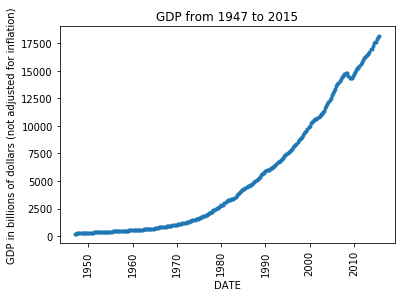

In [121]:
plt.plot(GDP_df['DATE'], GDP_df['GDP (in billions)'], '.')
plt.xticks(rotation='vertical')
plt.xlabel('DATE')
plt.ylabel('GDP in billions of dollars (not adjusted for inflation)')
plt.title('GDP from 1947 to 2015')

extracting year from date column causes a warning: 
"A value is trying to be set on a copy of a slice from a DataFrame."

In [122]:
GDP_df['YEAR'] = GDP_df['DATE'].dt.year
GDP_df = GDP_df[['DATE','YEAR','GDP (in billions)']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


isolating only YEAR and GDP columns from dataframe (GDP is measured in billions of dollars)

In [123]:
GDP_df = GDP_df.drop('DATE',1)

summing quarterly measurements of GDP to annual measurements using groupby(). GDP is measured in billions of dollars

In [124]:
GDP_df = GDP_df.groupby(['YEAR']).sum()

Using describe() again to look at cleaned data

In [125]:
describe_df = GDP_df.describe()
describe_df

,GDP (in billions)
count,69.000000
mean,21574.526087
std,21977.719940
min,999.800000
25%,2743.100000
50%,12843.800000
75%,36356.600000
max,71788.000000


# Prepare Data for Export

Adjust for inflation to 2017 dollars using cpi (the indices, YEAR, are integers). GDP is in billions of dollars

In [126]:
#i = year
#GDP_df.at[i,'GDP'] is dollars

for i in GDP_df.index:    
    GDP_df.at[i,'GDP_adjusted (in billions)'] = cpi.inflate(GDP_df.at[i,'GDP (in billions)'], i, to = 2018)

Text(0.5, 1.0, 'GDP from 1947 to 2015')

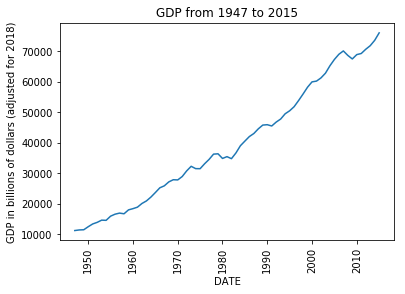

In [127]:
plt.plot(GDP_df['GDP_adjusted (in billions)'], '')
plt.xticks(rotation='vertical')
plt.xlabel('DATE')
plt.ylabel('GDP in billions of dollars (adjusted for 2018)')
plt.title('GDP from 1947 to 2015')

Since we are using data from 1984 - 2015 from other datasets, we will reduce the GDP_df dataframe to match.

In [128]:
GDP_df = GDP_df.loc[1984:2015,:]

In [129]:
#preview
GDP_df

,GDP (in billions),GDP_adjusted (in billions)
YEAR,,
1984,16162.8,39062.485270
1985,17387.0,40576.184099
1986,18360.5,42066.150306
1987,19480.9,43061.534827
1988,21010.5,44597.494704
1989,22630.8,45828.647545
1990,23918.3,45952.965249
1991,24696.2,45531.488204
1992,26157.2,46815.794871


Text(0.5, 1.0, 'GDP from 1984 to 2015')

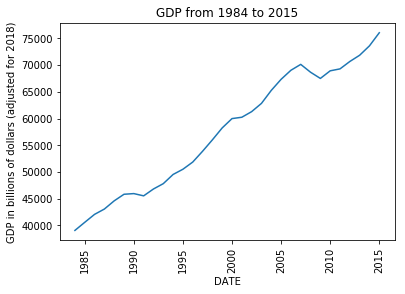

In [130]:
plt.plot(GDP_df['GDP_adjusted (in billions)'], '')
plt.xticks(rotation='vertical')
plt.xlabel('DATE')
plt.ylabel('GDP in billions of dollars (adjusted for 2018)')
plt.title('GDP from 1984 to 2015')

Export file as CSV

In [131]:
cleaned_GDP_csv = GDP_df.to_csv (r'clean_GDP.csv')